### ver ideas eda guardado (panda profile, video, mas intro, kdplot..densidad)

### IBM HR Analytics Employee Attrition & Performance

![Getting Started](empleados1.jpg)

Attrition is the silent killer that can swiftly disable even the most successful and stable of organizations in a shockingly spare amount of time. While many companies put an emphasis on the costly process of hiring and recruiting, there isn’t enough attention invested in solving the issues that cause top talent to leave. Although compensation is the most commonly associated reason behind attrition, let's make an analysis to see if this is really one of the most important motives ¡¡¡

Understanding the motivations behind employee attrition is the essential first step in understanding the problem and properly addressing it before substantial, long-lasting damage is caused to your organization. Thankfully, with this EDA we will be able to provide employers the actionable insights they need to better understand their employees and make any necessary changes before turnover rates swell, productivity drops, and the entire company’s future is suddenly less bright.

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

%config InlineBackend.figure_format = 'retina'
sns.set_style("white")
rcParams['figure.figsize'] = 6,4

In [77]:
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [78]:
# target columns = 	Attrition
# is null
null = df.isnull().sum() 
null[null > 0] # no hay nulos

Series([], dtype: int64)

In [79]:
# convertimos primero y en numerico
y_dict = {"Yes":1,"No":0}
df["Attrition_numeric"] = df["Attrition"].map(y_dict)


In [80]:
# no nos sirven
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',"Attrition"], axis="columns", inplace=True)

In [81]:
#describe
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numeric
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,...,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,2.72,65.89,2.73,2.06,2.73,6502.93,...,2.71,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12,0.16
std,9.14,403.51,8.11,1.02,1.09,20.33,0.71,1.11,1.10,4707.96,...,1.08,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57,0.37
min,18.00,102.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,...,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,2.00,48.00,2.00,1.00,2.00,2911.00,...,2.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00,0.00
50%,36.00,802.00,7.00,3.00,3.00,66.00,3.00,2.00,3.00,4919.00,...,3.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00,0.00
75%,43.00,1157.00,14.00,4.00,4.00,83.75,3.00,3.00,4.00,8379.00,...,4.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00,0.00
max,60.00,1499.00,29.00,5.00,4.00,100.00,4.00,5.00,4.00,19999.00,...,4.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00,1.00


In [82]:
# trabajadores cansados versus no: creamos un dataframe  de ambos
attrition_yes = df.loc[df["Attrition_numeric"] == 1]
attrition_no = df.loc[df["Attrition_numeric"] == 0]


In [150]:
# creamos dataframe con la media de ambos
df_mean_attrition = pd.concat((attrition_yes.mean(),attrition_no.mean()),axis=1)
df_mean_attrition.columns = ["Yes","No"]
df_mean_attrition.round(2).style.background_gradient(cmap=sns.diverging_palette(150, 80, n=200,as_cmap=True),axis=1)

,Yes,No
Age,33.610000,37.560000
DailyRate,750.360000,812.500000
DistanceFromHome,10.630000,8.920000
Education,2.840000,2.930000
EnvironmentSatisfaction,2.460000,2.770000
HourlyRate,65.570000,65.950000
JobInvolvement,2.520000,2.770000
JobLevel,1.640000,2.150000
JobSatisfaction,2.470000,2.780000
MonthlyIncome,4787.090000,6832.740000


Text(0, 0.5, 'Frecuency')

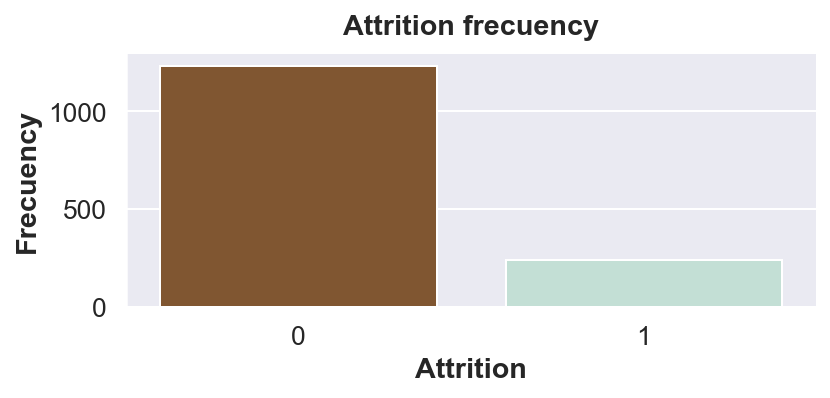

In [166]:
# vemos frecuency de nuestra clase a predecir

df_class = df["Attrition_numeric"].value_counts().reset_index()
plt.figure(figsize=(6,3))
sns.barplot(x="index",y="Attrition_numeric",data=df_class,palette=["#8D5524","#BEE4D7"])
sns.despine()
plt.title("Attrition frecuency")
plt.xlabel("Attrition")
plt.ylabel("Frecuency")

In [85]:
# col numericas usando describe
num_col = df.describe().columns.tolist()

In [86]:
## corr
corr = df[num_col].corr()

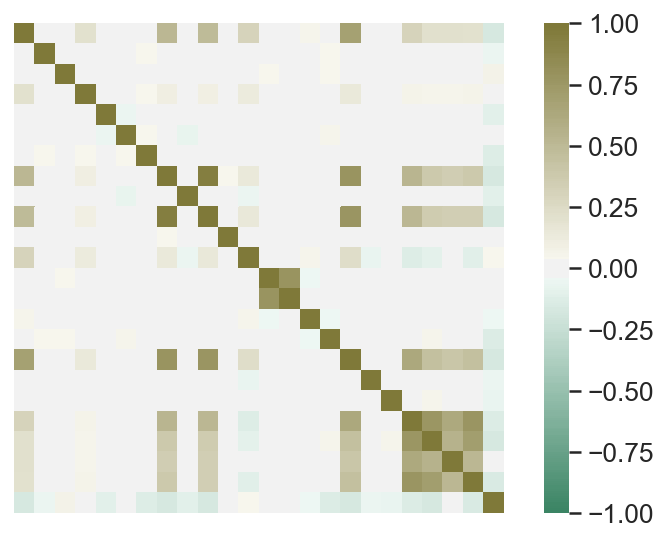

In [149]:
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(150, 80, n=200),
    square=True,xticklabels=False, yticklabels=False)


In [148]:
#to_frame().style.background_gradient(cmap='viridis')
corr["Attrition_numeric"].to_frame().style.background_gradient(cmap=sns.diverging_palette(150, 80, n=200,as_cmap=True))

,Attrition_numeric
Age,-0.159205
DailyRate,-0.056652
DistanceFromHome,0.077924
Education,-0.031373
EnvironmentSatisfaction,-0.103369
HourlyRate,-0.006846
JobInvolvement,-0.130016
JobLevel,-0.169105
JobSatisfaction,-0.103481
MonthlyIncome,-0.159840


In [88]:
# vemos hay multicolianiedad; por ejemplo vemos que los años en la compañia(years..) esta relacionada con muchas variables: sueldo...
# por ello tenemos que valorar hacer un pca u otro procedimiento para reducir un poco las features

In [89]:
# hay muchas features que estan correlacioneadas; veamos categoricas (tenemos que ver si hay muchas unique)
df.describe(include="object")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1043,961,606,882,326,673,1054


In [90]:
 #categorical cols
 cat_cols = df.describe(include="object").columns.tolist()

### cambiar este modelo, buscar cosas mas concretas (hombre,mujer..)
https://www.kaggle.com/janiobachmann/attrition-in-an-organization-why-workers-quit

### desmenuzar la grafica en vez de hacerlo todo a la vez

In [92]:
# aqui vemos una serie de cosas interesantes: una persona que viaja mucho por trabajo, mayoritariamente en ventas, un poco mas hombres que mujeres, hace horas extras y soltero.

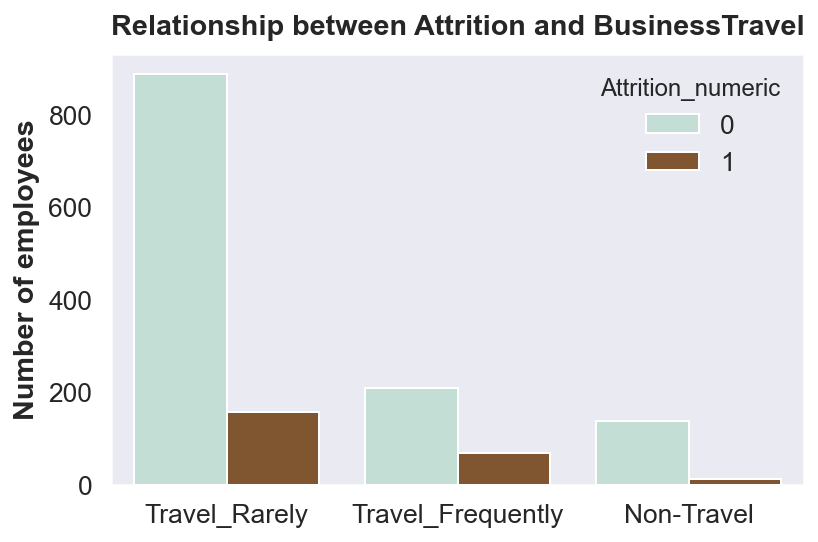

In [165]:
# bussines travel
plt.figure(figsize=(6,4))
color = ["#BEE4D7","#8D5524","#BEE4D7"]
g = sns.countplot(x="BusinessTravel", hue='Attrition_numeric', data=df,palette=color)
plt.ylabel('')
plt.title("Relationship between Attrition and BusinessTravel")
plt.ylabel("Number of employees")
plt.xlabel("")
plt.grid(False)

In [94]:
# We found that employees who are more likely to travel for work are more likely to resign.

### crear una funcion con jobrole y hacer varias graficas chulas 

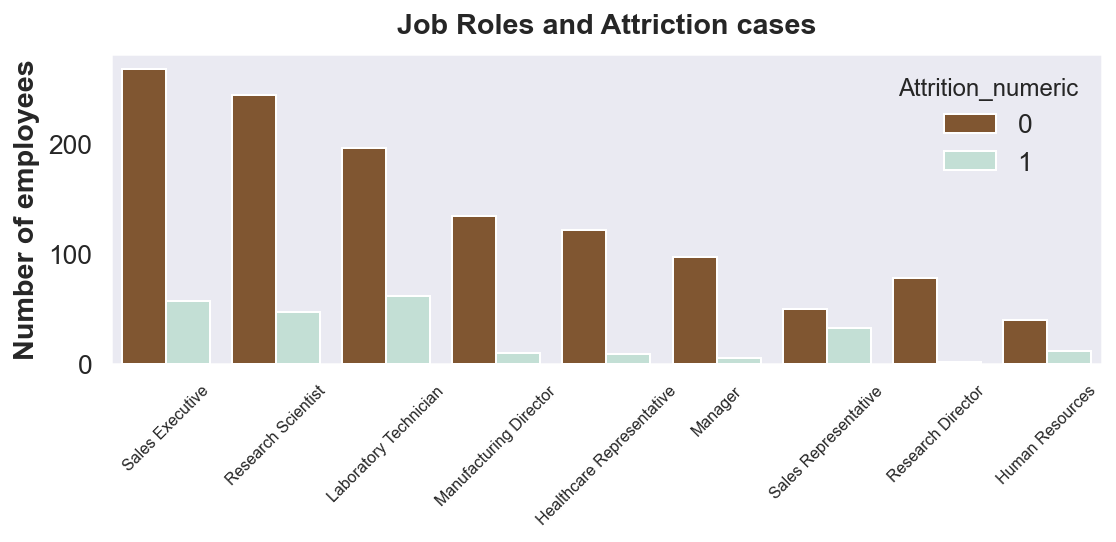

In [159]:
# bussines travel


colors = [ "#8D5524", "#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7","#BEE4D7"]



#plot
plt.figure(figsize=(8,4))
g = sns.countplot(x="JobRole", hue='Attrition_numeric', data=df,palette=colors)
g.set_xticklabels(g.get_xticklabels(),fontsize=8, rotation=45)
plt.ylabel('')
plt.title("Job Roles and Attriction cases")
plt.xlabel("")
plt.ylabel("Number of employees")
plt.grid(False)

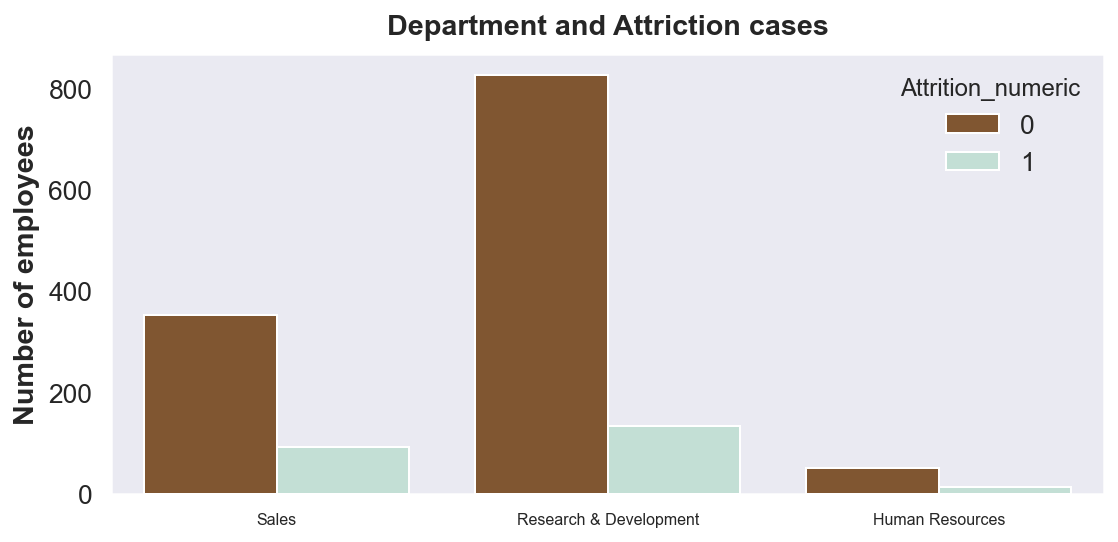

In [162]:
#department
plt.figure(figsize=(8,4))
g = sns.countplot(x="Department", hue='Attrition_numeric', data=df,palette=colors)
g.set_xticklabels(g.get_xticklabels(),fontsize=8)
plt.ylabel('')
plt.title("Departments and Attriction cases")
plt.xlabel("")
plt.ylabel("Number of employees")
plt.grid(False)

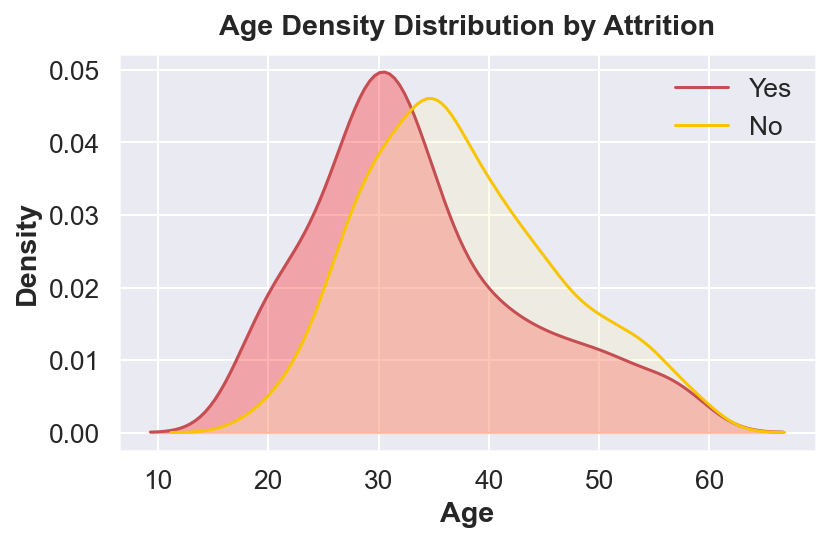

In [118]:
# age
plt.figure(figsize=(6,4))
ax = sns.distplot(attrition_yes["Age"],hist=False,label="Yes",color="r")
ax = sns.distplot(attrition_no["Age"],hist=False,label="No",color="#F8C500")
plt.title("Age Density Distribution by Attrition")
plt.ylabel("Density")
plt.legend()
# Get the two lines from the axes to generate shading
l1 = ax.lines[0]
l2 = ax.lines[1]

# Get the xy data from the lines so that we can shade
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="red", alpha=0.3)
ax.fill_between(x2,y2, color="#FAF2BE", alpha=0.3)

plt.show(block=False)

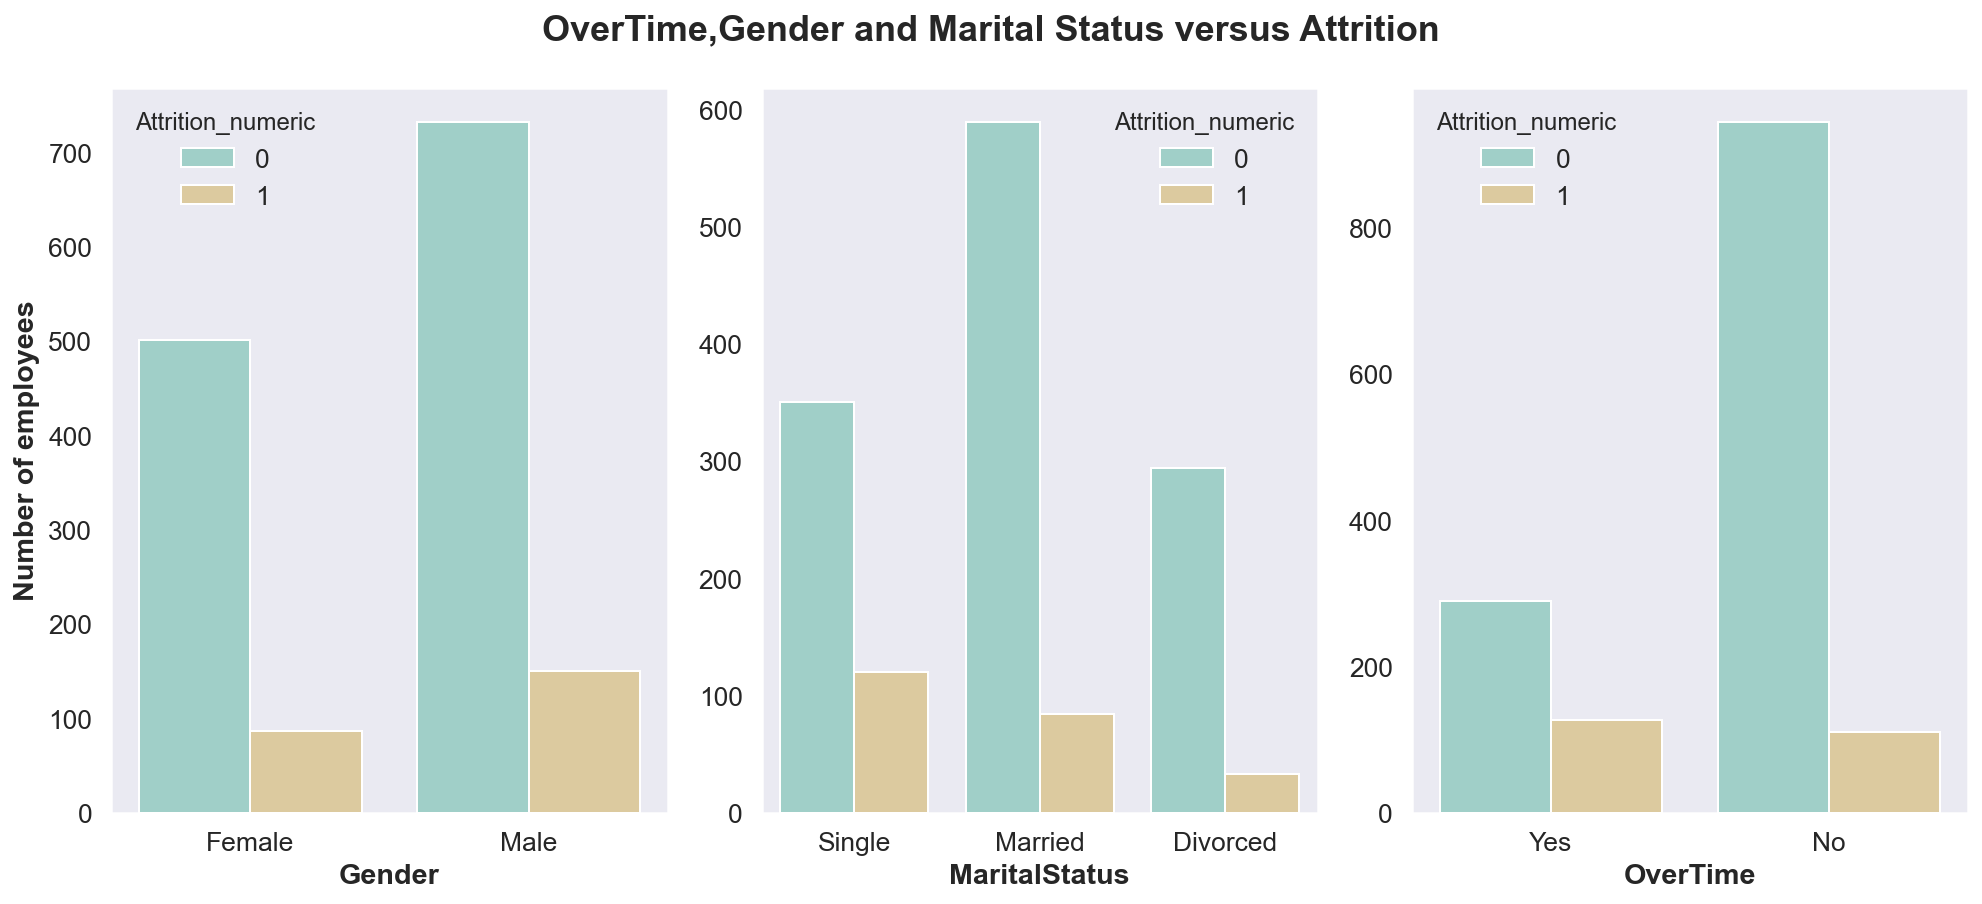

In [153]:
# marital status and gender
plt.figure(figsize=(14,6))
plt.suptitle('OverTime,Gender and Marital Status versus Attrition',fontweight="bold",fontsize=18,y=1.05)

for i,column in enumerate(["Gender","MaritalStatus","OverTime"],1):
    plt.subplot(1, 3,i)
    g = sns.countplot(x=f"{column}", hue='Attrition_numeric', data=df,palette='BrBG_r')    
    plt.xlabel(column)
    plt.grid(False) 
    if i == 1:
        g.set(ylabel="Number of employees")
    else:
        g.set(ylabel="")    
    
